Os dados geograficos utilizados para plotar os mapas foram retirados daqui(countries.json):
https://github.com/datasets/geo-countries/blob/master/data/countries.geojson
Boas referências para aprender um pouco mais sobre o matplotlib:
https://matplotlib.org/tutorials/introductory/lifecycle.html
https://pbpython.com/effective-matplotlib.html
Os dados dos paises foram retirados daqui(Country-data.csv e data-dictionary.csv):
https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data?select=data-dictionary.csv
PCA no python
https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('Country-data.csv')

In [62]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [4]:
data_dictionary = pd.read_csv('data-dictionary.csv')

In [5]:
pd.set_option('display.max_colwidth', 100)
data_dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to...
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remai...
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [6]:
pd.set_option('display.max_colwidth', 40)

In [7]:
#passando apenas os valores para um array do numpy
dataset_array = data.loc[:, data.columns != 'country'].values

In [8]:
#normalizando os dados do array
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset_array)

In [9]:
scaled_features

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [10]:
colunas = list(data.columns)
colunas = [x for x in colunas if x not in ['country', 'cluster']]

In [11]:
data_scaled = pd.DataFrame(data=scaled_features, columns=colunas)
data_scaled['country']=data['country']

In [12]:
#os dados normalizado no dataset
data_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,Vanuatu
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,Venezuela
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,Vietnam
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,Yemen


In [13]:
#usando o kmeans para separar os paises em 3 grupos(clusters)
kmeans = KMeans(init="random",
        n_clusters=3,
        n_init=10,
        max_iter=300,
        random_state=42)

In [14]:
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [15]:
#vendo o grupo dos 5 primeiros paises
kmeans.labels_[:5]

array([1, 2, 2, 1, 2])

In [16]:
#adicionando a coluna cluster e colocando o respectivo grupo de cada pais
data['cluster'] = kmeans.labels_[:]
data_scaled['cluster'] = kmeans.labels_[:]

In [17]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [18]:
data[data['country']=='Brazil']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
22,Brazil,19.8,10.7,9.01,11.8,14500,8.41,74.2,1.8,11200,2


In [19]:
countries = gpd.read_file("countries.json")
countries.head()

,ADMIN,ISO_A3,ISO_A2,geometry
0,Aruba,ABW,AW,"MULTIPOLYGON (((-69.99694 12.57758, ..."
1,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.04980 38.40866, 7..."
2,Angola,AGO,AO,"MULTIPOLYGON (((11.73752 -16.69258, ..."
3,Anguilla,AIA,AI,"MULTIPOLYGON (((-63.03767 18.21296, ..."
4,Albania,ALB,AL,"MULTIPOLYGON (((19.74777 42.57890, 1..."


In [20]:
countries[countries['ISO_A3']=='MEX']

,ADMIN,ISO_A3,ISO_A2,geometry
146,Mexico,MEX,MX,"MULTIPOLYGON (((-114.73404 18.32925,..."


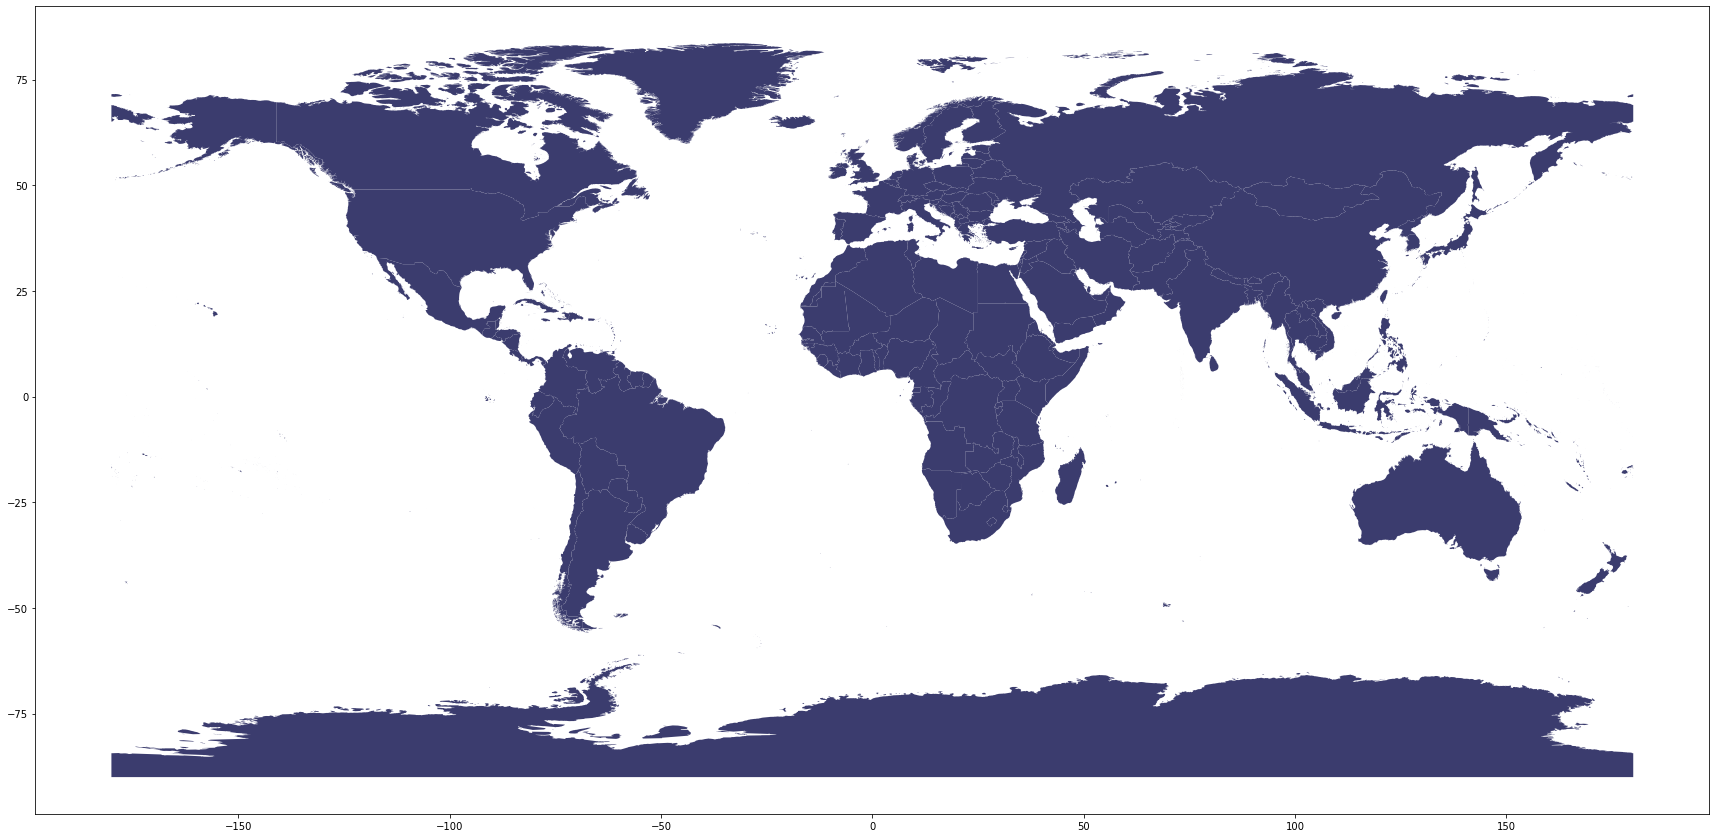

In [21]:
#plotando um grafico com o geopandas
countries.plot(figsize=(30,20), color='#3B3C6E')

In [22]:
#fazendo um join entre os dados geograficos e a tabela com os clusters
country = countries.merge(right=data, how='right', right_on='country', left_on='ADMIN').loc[:,['ADMIN','ISO_A3','ISO_A2','geometry','cluster','country']]
country

,ADMIN,ISO_A3,ISO_A2,geometry,cluster,country
0,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.04980 38.40866, 7...",1,Afghanistan
1,Angola,AGO,AO,"MULTIPOLYGON (((11.73752 -16.69258, ...",1,Angola
2,Albania,ALB,AL,"MULTIPOLYGON (((19.74777 42.57890, 1...",2,Albania
3,United Arab Emirates,ARE,AE,"MULTIPOLYGON (((53.86305 24.23469, 5...",0,United Arab Emirates
4,Argentina,ARG,AR,"MULTIPOLYGON (((-68.65412 -54.88624,...",2,Argentina
...,...,...,...,...,...,...
162,NaN,NaN,NaN,None,0,Slovak Republic
163,NaN,NaN,NaN,None,2,St. Vincent and the Grenadines
164,NaN,NaN,NaN,None,1,Tanzania
165,NaN,NaN,NaN,None,1,Timor-Leste


In [23]:
#paises que não foram encontrados no json do mapa
paises = list(country[country['ADMIN'].isna()]['country'])
paises

['Bahamas',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Guinea-Bissau',
 'Kyrgyz Republic',
 'Lao',
 'Macedonia, FYR',
 'Micronesia, Fed. Sts.',
 'Serbia',
 'Slovak Republic',
 'St. Vincent and the Grenadines',
 'Tanzania',
 'Timor-Leste',
 'United States']

In [24]:
#nome desses paises no arquivo json
paises_format = ['The Bahamas','Democratic Republic of the Congo', 'Republic of Congo',
                'Ivory Coast', 'Guinea Bissau', 'Kyrgyzstan', 'Laos', 'Macedonia',
                'Federated States of Micronesia', 'Republic of Serbia', 'Slovakia',
                'Saint Vincent and the Grenadines', 'United Republic of Tanzania',
                'East Timor', 'United States of America']

In [25]:
for i in range(len(paises_format)):
    data['country']=data['country'].replace(paises[i],paises_format[i])

In [26]:
country = countries.merge(right=data, how='left', right_on='country', left_on='ADMIN').loc[:,['ADMIN','ISO_A3','ISO_A2','geometry','cluster']]
country

,ADMIN,ISO_A3,ISO_A2,geometry,cluster
0,Aruba,ABW,AW,"MULTIPOLYGON (((-69.99694 12.57758, ...",NaN
1,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.04980 38.40866, 7...",1.0
2,Angola,AGO,AO,"MULTIPOLYGON (((11.73752 -16.69258, ...",1.0
3,Anguilla,AIA,AI,"MULTIPOLYGON (((-63.03767 18.21296, ...",NaN
4,Albania,ALB,AL,"MULTIPOLYGON (((19.74777 42.57890, 1...",2.0
...,...,...,...,...,...
250,Samoa,WSM,WS,MULTIPOLYGON (((-171.57002 -13.93816...,2.0
251,Yemen,YEM,YE,"MULTIPOLYGON (((53.30824 12.11839, 5...",1.0
252,South Africa,ZAF,ZA,"MULTIPOLYGON (((37.86378 -46.94085, ...",1.0
253,Zambia,ZMB,ZM,"MULTIPOLYGON (((31.11984 -8.61663, 3...",1.0


In [27]:
#trocando os na para o numero 5 para não dar problema na hora de plotar o mapa
country['cluster']=country['cluster'].fillna(5)
country

,ADMIN,ISO_A3,ISO_A2,geometry,cluster
0,Aruba,ABW,AW,"MULTIPOLYGON (((-69.99694 12.57758, ...",5.0
1,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.04980 38.40866, 7...",1.0
2,Angola,AGO,AO,"MULTIPOLYGON (((11.73752 -16.69258, ...",1.0
3,Anguilla,AIA,AI,"MULTIPOLYGON (((-63.03767 18.21296, ...",5.0
4,Albania,ALB,AL,"MULTIPOLYGON (((19.74777 42.57890, 1...",2.0
...,...,...,...,...,...
250,Samoa,WSM,WS,MULTIPOLYGON (((-171.57002 -13.93816...,2.0
251,Yemen,YEM,YE,"MULTIPOLYGON (((53.30824 12.11839, 5...",1.0
252,South Africa,ZAF,ZA,"MULTIPOLYGON (((37.86378 -46.94085, ...",1.0
253,Zambia,ZMB,ZM,"MULTIPOLYGON (((31.11984 -8.61663, 3...",1.0


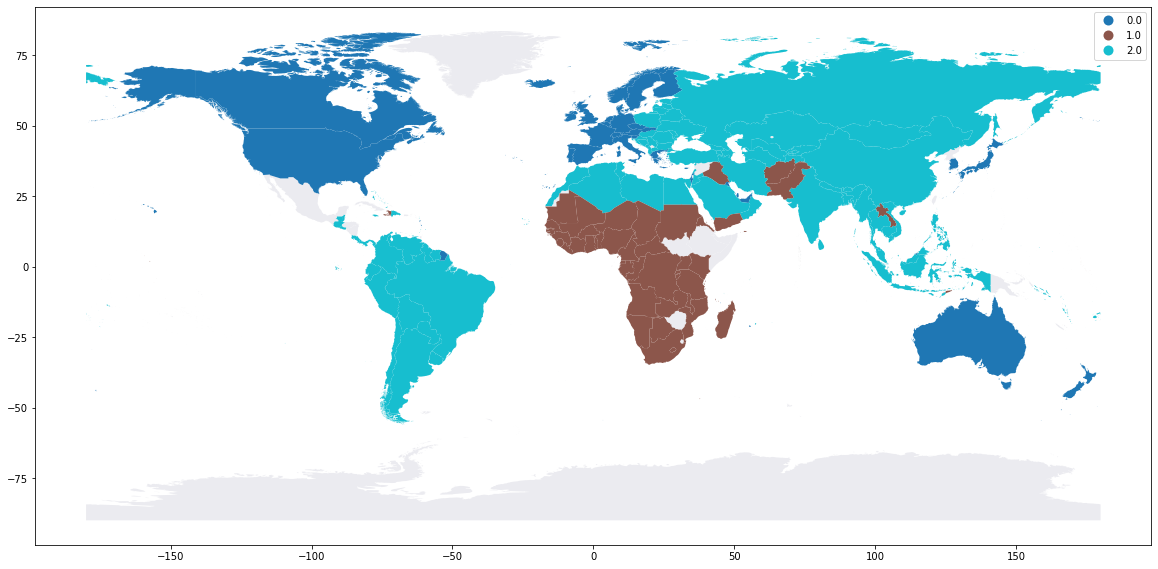

In [28]:
fig, ax = plt.subplots(figsize=(20, 20))
country[country['cluster']==5].plot(ax=ax,color='#EBEBF0')#plotando os nan com um cor bem clara
country[country['cluster']!=5].plot(column='cluster',categorical=True, legend=True,ax=ax)

In [29]:
means = pd.DataFrame(index=range(3),columns=colunas)
means_scaled = pd.DataFrame(index=range(3),columns=colunas)

In [30]:
means

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
statistics.mean(data[data['cluster']==0]['gdpp'])

42494.444444444445

In [32]:
for cluster in range(3):
    for item in colunas:
        means.iloc[cluster][item]=statistics.mean(data[data['cluster']==cluster][item])

In [33]:
means
#medias por cluters

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,5,58.7389,8.80778,51.4917,45672.2,2.67125,80.1278,1.75278,42494.4
1,92.9617,29.1513,6.38851,42.3234,3942.4,12.0197,59.1872,5.00809,1922.38
2,21.9274,40.2439,6.20095,47.4734,12305.6,7.6009,72.8143,2.3075,6486.45


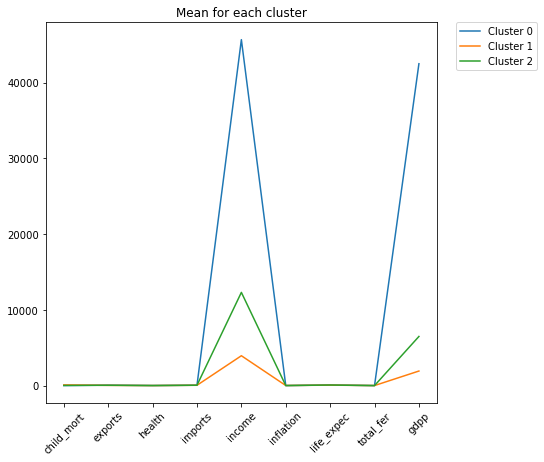

In [34]:
fig, ax = plt.subplots(figsize=(7,7))
plt.title('Mean for each cluster')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.plot(means.columns,means.iloc[0], label='Cluster 0')
plt.plot(means.columns,means.iloc[1], label='Cluster 1')
plt.plot(means.columns,means.iloc[2], label='Cluster 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#como os valores estão em escalas bem diferentes acaba ficando um gráfico ruim para comparação das medias

In [35]:
for cluster in range(3):
    for item in colunas:
        means_scaled.iloc[cluster][item]=statistics.mean(data_scaled[data_scaled['cluster']==cluster][item])

In [36]:
means_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.827449,0.64508,0.727411,0.190639,1.48424,-0.484921,1.07958,-0.791877,1.616
1,1.36022,-0.437533,-0.155984,-0.189204,-0.686894,0.402111,-1.28218,1.36494,-0.604242
2,-0.406453,-0.0316526,-0.224471,0.0241616,-0.25177,-0.0171674,0.254734,-0.424343,-0.354481


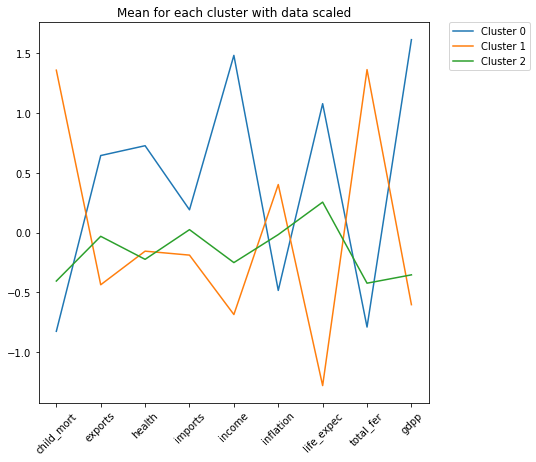

In [37]:
fig, ax = plt.subplots(figsize=(7,7))
plt.title('Mean for each cluster with data scaled')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.plot(means_scaled.columns,means_scaled.iloc[0], label='Cluster 0')
plt.plot(means_scaled.columns,means_scaled.iloc[1], label='Cluster 1')
plt.plot(means_scaled.columns,means_scaled.iloc[2], label='Cluster 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#normalizei os dados para comparar seus valores médios

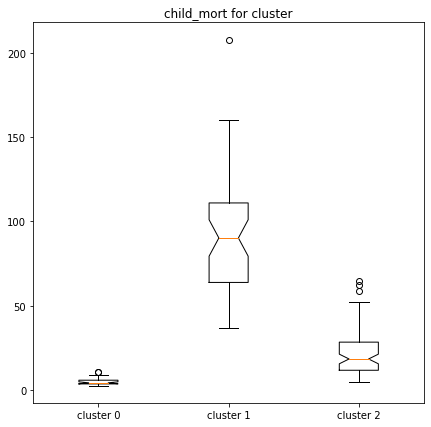

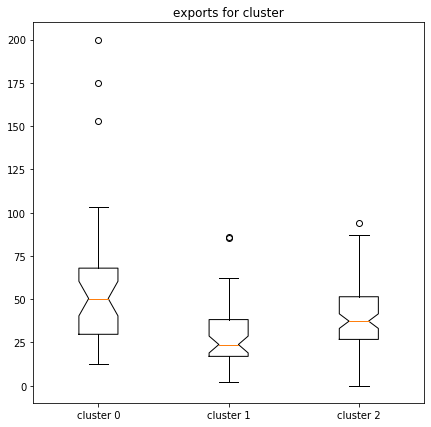

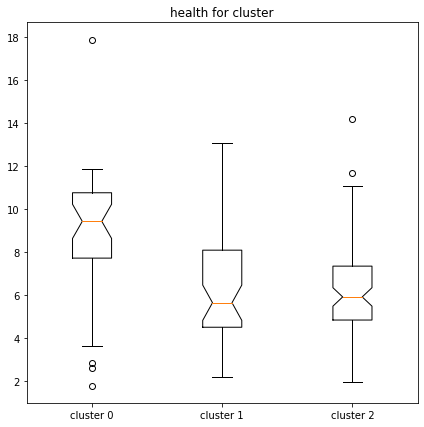

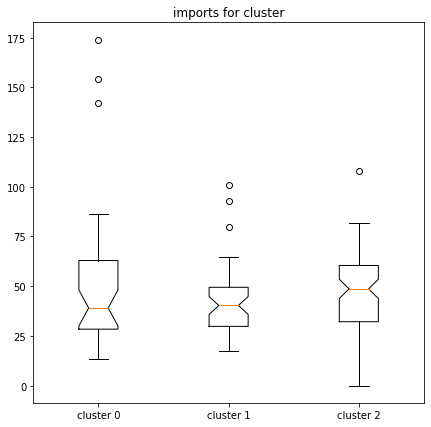

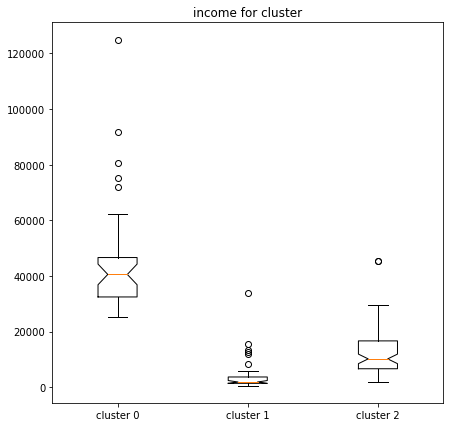

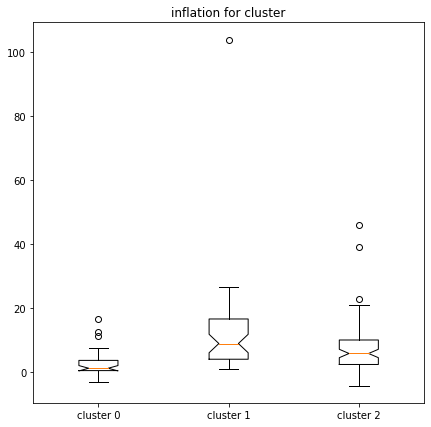

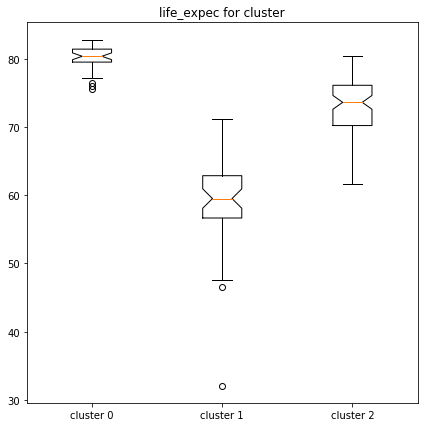

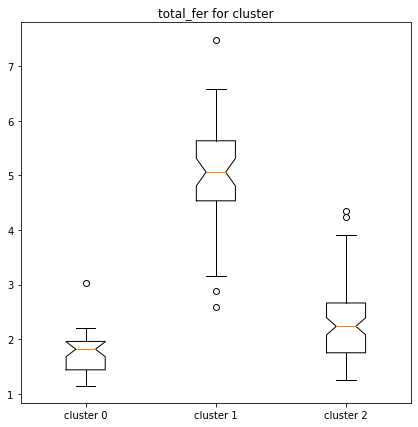

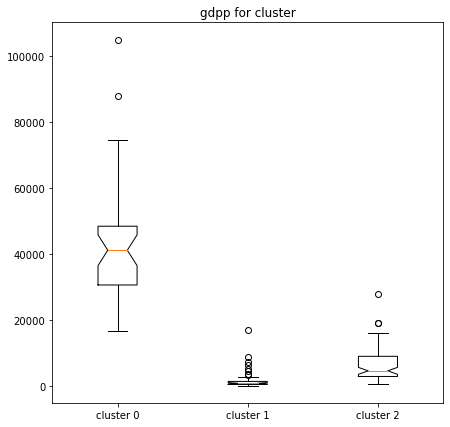

In [38]:
#plotando os boxplots para cada variavel
for var in colunas:
    fig, ax = plt.subplots(figsize=(7,7))
    ax.set_title(var+' for cluster')
    ax.boxplot([data[data['cluster']==0][var],data[data['cluster']==1][var],data[data['cluster']==2][var]]
               ,labels=['cluster 0','cluster 1', 'cluster 2'], notch=True)


In [39]:
#usando o pca para diminuir nossas componentes de 9 para 2
pca = PCA(n_components=2)
#os dados devem estar normalizados para usar o pca
principalComponents = pca.fit_transform(scaled_features)
#passando para um dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['country'] = data_scaled['country']
principalDf['cluster']= data_scaled['cluster']

In [49]:
#porcentagem da variança explicada pela duas componentes principais
sum(pca.explained_variance_ratio_)*100

63.1333654377141

In [50]:
#com essa informação consiguimos saber quais são as variavéis mais importantes para cada componente
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ]])

In [40]:
principalDf

,principal component 1,principal component 2,country,cluster
0,-2.913025,0.095621,Afghanistan,1
1,0.429911,-0.588156,Albania,2
2,-0.285225,-0.455174,Algeria,2
3,-2.932423,1.695555,Angola,1
4,1.033576,0.136659,Antigua and Barbuda,2
...,...,...,...,...
162,-0.820631,0.639570,Vanuatu,2
163,-0.551036,-1.233886,Venezuela,2
164,0.498524,1.390744,Vietnam,2
165,-1.887451,-0.109453,Yemen,1


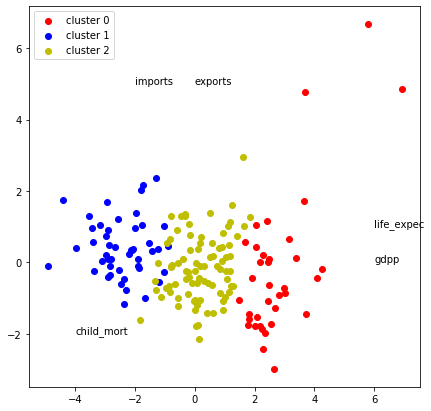

In [78]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_title('')
plt.text(6, 0, 'gdpp', ha='left', wrap=True)
plt.text(6, 1, 'life_expec', ha='left', wrap=True)
plt.text(-4, -2, 'child_mort', ha='left', wrap=True)
plt.text(0, 5, 'exports', ha='left', wrap=True)
plt.text(-2, 5, 'imports', ha='left', wrap=True)
ax.scatter(principalDf[principalDf['cluster']==0]['principal component 1'], principalDf[principalDf['cluster']==0]['principal component 2'], color='r', label='cluster 0')
ax.scatter(principalDf[principalDf['cluster']==1]['principal component 1'], principalDf[principalDf['cluster']==1]['principal component 2'], color='b', label='cluster 1')
ax.scatter(principalDf[principalDf['cluster']==2]['principal component 1'], principalDf[principalDf['cluster']==2]['principal component 2'], color='y', label='cluster 2')
ax.legend()

In [81]:
#o problema do pca é que não tem um significado exato para os eixos x e y, mas podemos comparar quanto um cluster tá perto do outro
fig = px.scatter(principalDf, x="principal component 1", y="principal component 2", color="cluster", hover_data=['country'])
fig.add_annotation(text="max=5")
fig.show()

In [76]:
data[data['country']=='United States of America']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
159,United States of America,7.3,12.4,17.9,15.8,49400,1.22,78.7,1.93,48400,0


In [61]:
data[data['country']=='Austria']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
8,Austria,4.3,51.3,11.0,47.8,43200,0.873,80.5,1.44,46900,0


In [43]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=colunas, y=means.iloc[0], mode='lines', name='cluster 0'))
fig.add_trace(go.Scatter(x=colunas, y=means.iloc[1], mode='lines', name='cluster 1'))
fig.add_trace(go.Scatter(x=colunas, y=means.iloc[2], mode='lines', name='cluster 2'))